# Capstone project week 4 Peer Graded Assignment

## Toronto the city of dreams and business

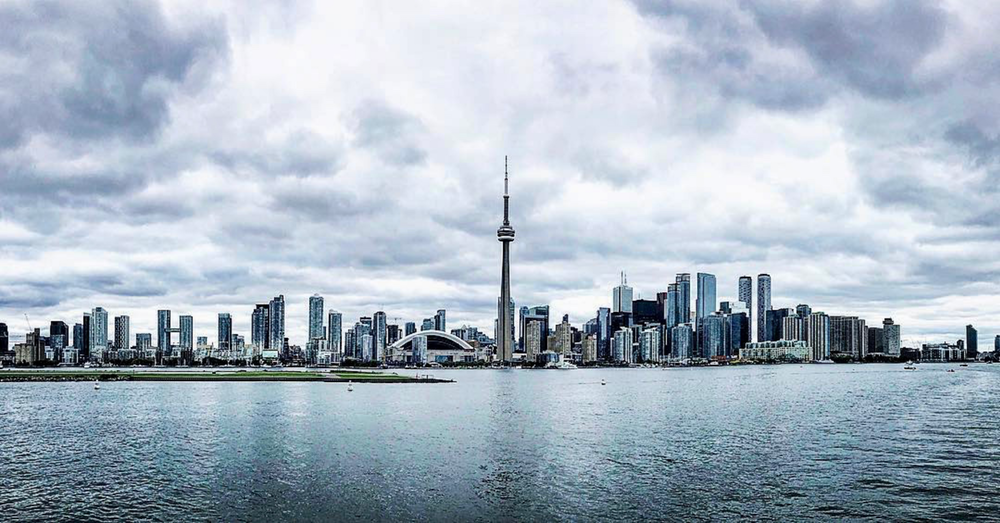

In [6]:
from PIL import Image
import requests
url = 'https://images.unsplash.com/photo-1535776142635-8fa180c46af7?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&w=1000&q=80'
im = Image.open(requests.get(url, stream=True).raw)
im

## Introduction to the Problem 

### About Toronto City
Toronto is the provincial capital of Ontario and the most populous city in Canada, with a population of 2,731,571 in 2016. Current to 2016, the Toronto census metropolitan area (CMA), of which the majority is within the Greater Toronto Area (GTA), held a population of 5,928,040, making it Canada's most populous CMA. Toronto is the fastest growing city in North America, and is the anchor of an urban agglomeration, known as the Golden Horseshoe in Southern Ontario, located on the northwestern shore of Lake Ontario. Toronto is an international centre of business, finance, arts, and culture, and is recognized as one of the most multicultural and cosmopolitan cities in the world.
### Coming to the question/business idea 
As Toronto is a city of dreams and business, a billionaire guy from India is coming to invest in some business in Toronto after seeing the potential of the city and the growth rate he becomes sure that Toronto is the right place to invest his money but the problem is that he is unsure in which field he want to invest money like in the field of restaurants, hotels, shopping complexes, cafes and many more. So he asks a team to look for all the fields mentioned above and give him an idea which field is good to invest the parameters for judging can be different just like if he looks for restaurants then it depends on where it is located how is the popularity of that restaurant the services provided to the customers  if the response is good this will lead the businessman buying the restaurant  and is same with other fields. We'll be using Foursquare API to analyze different fields such as restaurants, hotels, cafes, shopping complex and check out their neighbourhood in the city of Toronto and also the businessman is coming to take some good memories of canada back with him so he is coming with some professional photographers and it's an intended request of the businessman that it will be more preferable if the fields for which he is looking for is near some beautiful landscapes.<strong> So the main purpose is to make a list of places of landscape in Toronto, including the nearest restaurants, cafes, and shopping stores for each place.</strong>

## Data used in the capstone project


The data used in this project is provided by Foursquare location data. All the data of the restaurants,hotels,cafes are taken out with the help of Foursquare API. We will also use Foursquare location data to find the details of the neighbours of that particular region.

## Importing all the necessary libraries

In [2]:
import requests # to handle requests
import pandas as pd # for data analsysis
import numpy as np # to handle data in a vectorized manner

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
#tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print("Libraries imported !! ")

WARNING conda.base.context:use_only_tar_bz2(632): Conda is constrained to only using the old .tar.bz2 file format because you have conda-build installed, and it is <3.18.3.  Update or remove conda-build to get smaller downloads and faster extractions.
Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - anaconda/linux-64::grpcio==1.16.1=py36hf8bcb03_1 -> openssl[version='>=1.1.1,<1.1.2.0a0']

Current channels:

  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.


WARNING conda.base.context:use_only_tar_bz2(632): Co

## Entering the foursquare details to explore our beautiful city of Toronto

In [3]:
ClIENT_ID = '4K3D2W4JJJU32CN2CS0GJCSDQR2UFSRAC0FKSEB0IKSE4QSA'# Foursquare ID
ClIENT_SECRET = 'JGHHEXLTN1UNXP14FV3TV3E2ZLZI31ZWNTU0YCJ5WOQSILN5' #  Foursquare Secret
VERSION = '20180604'
LIMIT =30
print('Your credentails:')
print('Foursquare_ID: ' + ClIENT_ID)
print('Foursquare_Secret:' + ClIENT_SECRET)

Your credentails:
Foursquare_ID: 4K3D2W4JJJU32CN2CS0GJCSDQR2UFSRAC0FKSEB0IKSE4QSA
Foursquare_Secret:JGHHEXLTN1UNXP14FV3TV3E2ZLZI31ZWNTU0YCJ5WOQSILN5


## Defining city of Toronto and finding it's longitude and latitude


In [6]:
city = 'Toronto'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(city)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.653963 -79.387207


## Finding hotel with the help of url using foursqure

In [7]:
search_query = 'Hotel'
radius = 500

# Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'\
.format(ClIENT_ID, ClIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=4K3D2W4JJJU32CN2CS0GJCSDQR2UFSRAC0FKSEB0IKSE4QSA&client_secret=JGHHEXLTN1UNXP14FV3TV3E2ZLZI31ZWNTU0YCJ5WOQSILN5&ll=43.653963,-79.387207&v=20180604&query=Hotel&radius=500&limit=30'

## Sending GET request to find and examine the results

In [9]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d2092f6d69ed000395e5236'},
 'response': {'venues': [{'id': '4ab2d511f964a5209b6c20e3',
    'name': 'Sheraton Centre Toronto Hotel',
    'location': {'address': '123 Queen Street West',
     'crossStreet': 'at York St.',
     'lat': 43.651129283252786,
     'lng': -79.38382900313331,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.651129283252786,
       'lng': -79.38382900313331}],
     'distance': 416,
     'postalCode': 'M5H 2M9',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['123 Queen Street West (at York St.)',
      'Toronto ON M5H 2M9',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d1fa931735',
      'name': 'Hotel',
      'pluralName': 'Hotels',
      'shortName': 'Hotel',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1562415862',
    'hasPerk

In [13]:
# assign all the relevent data from JSON to venues dataframe
venues = results['response']['venues']

# converting venues into dataframe 
dataframe_hotel = json_normalize(venues)
dataframe_hotel.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,4ab2d511f964a5209b6c20e3,123 Queen Street West,CA,Toronto,Canada,at York St.,416,"[123 Queen Street West (at York St.), Toronto ...","[{'label': 'display', 'lat': 43.65112928325278...",43.651129,-79.383829,NaN,M5H 2M9,ON,Sheraton Centre Toronto Hotel,v-1562415862,NaN
1,"[{'id': '4bf58dd8d48988d1e7931735', 'name': 'J...",False,4b68aed1f964a520de862be3,194 Queen St W,CA,Toronto,Canada,Queen & St. Patrick,400,"[194 Queen St W (Queen & St. Patrick), Toronto...","[{'label': 'display', 'lat': 43.65050475544005...",43.650505,-79.388577,NaN,M5V 1Z1,ON,The Rex Hotel Jazz & Blues Bar,v-1562415862,62225795
2,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,58b7d72dcc05d161570bd712,123 Queen Street West,CA,Toronto,Canada,NaN,410,"[123 Queen Street West, Toronto ON M5H 2M9, Ca...","[{'label': 'display', 'lat': 43.65101646682632...",43.651016,-79.384148,NaN,M5H 2M9,ON,Sheraton Centre Toronto Hotel,v-1562415862,402127087
3,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,52ce14b0498e50457ce11780,108 Chestnut Street,CA,Toronto,Canada,Dundas St W,124,"[108 Chestnut Street (Dundas St W), Toronto ON...","[{'label': 'display', 'lat': 43.6546083, 'lng'...",43.654608,-79.385942,NaN,M5G 1R3,ON,DoubleTree by Hilton Hotel Toronto Downtown,v-1562415862,NaN
4,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,4f343a31e4b0230a3b337a90,123 Test Drive,CA,Toronto,Canada,at somewhere St,500,"[123 Test Drive (at somewhere St), Toronto ON ...","[{'label': 'display', 'lat': 43.658434, 'lng':...",43.658434,-79.387894,NaN,M2M 2M2,ON,VFM Test Hotel,v-1562415862,NaN


## Cleaning the hotel dataframe and showing hotels

In [15]:
# By cleaning I mean to inclue only the columns that include venue name, and anything that is associated with location
clean_columns = ['name', 'categories'] + [col for col in dataframe_hotel.columns if col.startswith('location.')]+ ['id']
clean_dataframe_hotel = dataframe_hotel.loc[:,clean_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
clean_dataframe_hotel['categories'] = clean_dataframe_hotel.apply(get_category_type, axis=1)

# clean column names by keeping only last term
clean_dataframe_hotel.columns = [column.split('.')[-1] for column in clean_dataframe_hotel.columns]

clean_dataframe_hotel.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Sheraton Centre Toronto Hotel,Hotel,123 Queen Street West,CA,Toronto,Canada,at York St.,416,"[123 Queen Street West (at York St.), Toronto ...","[{'label': 'display', 'lat': 43.65112928325278...",43.651129,-79.383829,NaN,M5H 2M9,ON,4ab2d511f964a5209b6c20e3
1,The Rex Hotel Jazz & Blues Bar,Jazz Club,194 Queen St W,CA,Toronto,Canada,Queen & St. Patrick,400,"[194 Queen St W (Queen & St. Patrick), Toronto...","[{'label': 'display', 'lat': 43.65050475544005...",43.650505,-79.388577,NaN,M5V 1Z1,ON,4b68aed1f964a520de862be3
2,Sheraton Centre Toronto Hotel,Hotel,123 Queen Street West,CA,Toronto,Canada,NaN,410,"[123 Queen Street West, Toronto ON M5H 2M9, Ca...","[{'label': 'display', 'lat': 43.65101646682632...",43.651016,-79.384148,NaN,M5H 2M9,ON,58b7d72dcc05d161570bd712
3,DoubleTree by Hilton Hotel Toronto Downtown,Hotel,108 Chestnut Street,CA,Toronto,Canada,Dundas St W,124,"[108 Chestnut Street (Dundas St W), Toronto ON...","[{'label': 'display', 'lat': 43.6546083, 'lng'...",43.654608,-79.385942,NaN,M5G 1R3,ON,52ce14b0498e50457ce11780
4,VFM Test Hotel,Hotel,123 Test Drive,CA,Toronto,Canada,at somewhere St,500,"[123 Test Drive (at somewhere St), Toronto ON ...","[{'label': 'display', 'lat': 43.658434, 'lng':...",43.658434,-79.387894,NaN,M2M 2M2,ON,4f343a31e4b0230a3b337a90


## Droping unnecessary columns from the dataframe

In [16]:

clean_dataframe2_hotel= clean_dataframe_hotel.drop(['cc', 'city', 'country', 'crossStreet', 'distance', 'formattedAddress',\
                                        'labeledLatLngs','neighborhood', 'id'], axis=1)
clean_dataframe2_hotel

,name,categories,address,lat,lng,postalCode,state
0,Sheraton Centre Toronto Hotel,Hotel,123 Queen Street West,43.651129,-79.383829,M5H 2M9,ON
1,The Rex Hotel Jazz & Blues Bar,Jazz Club,194 Queen St W,43.650505,-79.388577,M5V 1Z1,ON
2,Sheraton Centre Toronto Hotel,Hotel,123 Queen Street West,43.651016,-79.384148,M5H 2M9,ON
3,DoubleTree by Hilton Hotel Toronto Downtown,Hotel,108 Chestnut Street,43.654608,-79.385942,M5G 1R3,ON
4,VFM Test Hotel,Hotel,123 Test Drive,43.658434,-79.387894,M2M 2M2,ON
5,Sheraton Centre Toronto Hotel - Grand Ballroom,Ballroom,123 Queen Street West,43.651200,-79.384520,NaN,ON
6,Stathcona Hotel,Hotel,NaN,43.654947,-79.386359,NaN,ON
7,Shangri-La Toronto,Hotel,188 University Ave.,43.649129,-79.386557,M5H 0A3,ON
8,89 Chestnut Residence,College Residence Hall,89 Chestnut St.,43.654160,-79.385291,M5G 1R1,ON
9,Hilton Toronto,Hotel,145 Richmond St W,43.650143,-79.385488,M5H 2L2,ON


## Deleting rows with not assigned values

In [18]:

# delete rows with none values
clean_dataframe3 = clean_dataframe2_hotel.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
clean_dataframe3

,name,categories,address,lat,lng,postalCode,state
0,Sheraton Centre Toronto Hotel,Hotel,123 Queen Street West,43.651129,-79.383829,M5H 2M9,ON
1,The Rex Hotel Jazz & Blues Bar,Jazz Club,194 Queen St W,43.650505,-79.388577,M5V 1Z1,ON
2,Sheraton Centre Toronto Hotel,Hotel,123 Queen Street West,43.651016,-79.384148,M5H 2M9,ON
3,DoubleTree by Hilton Hotel Toronto Downtown,Hotel,108 Chestnut Street,43.654608,-79.385942,M5G 1R3,ON
4,VFM Test Hotel,Hotel,123 Test Drive,43.658434,-79.387894,M2M 2M2,ON
7,Shangri-La Toronto,Hotel,188 University Ave.,43.649129,-79.386557,M5H 0A3,ON
8,89 Chestnut Residence,College Residence Hall,89 Chestnut St.,43.654160,-79.385291,M5G 1R1,ON
9,Hilton Toronto,Hotel,145 Richmond St W,43.650143,-79.385488,M5H 2L2,ON
13,Marriott Downtown at CF Toronto Eaton Centre,Hotel,525 Bay Street,43.654728,-79.382422,M5G 2L2,ON
15,Lobby Lounge at the Shangri-La Toronto,Lounge,188 University Ave.,43.649155,-79.386546,M5H 0A3,ON


In [20]:
array_1= ['Hotel', 'Event Space']
hotel_dataframe= clean_dataframe3.loc[clean_dataframe3['categories'].isin(array_1)]
hotel_dataframe

,name,categories,address,lat,lng,postalCode,state
0,Sheraton Centre Toronto Hotel,Hotel,123 Queen Street West,43.651129,-79.383829,M5H 2M9,ON
2,Sheraton Centre Toronto Hotel,Hotel,123 Queen Street West,43.651016,-79.384148,M5H 2M9,ON
3,DoubleTree by Hilton Hotel Toronto Downtown,Hotel,108 Chestnut Street,43.654608,-79.385942,M5G 1R3,ON
4,VFM Test Hotel,Hotel,123 Test Drive,43.658434,-79.387894,M2M 2M2,ON
7,Shangri-La Toronto,Hotel,188 University Ave.,43.649129,-79.386557,M5H 0A3,ON
9,Hilton Toronto,Hotel,145 Richmond St W,43.650143,-79.385488,M5H 2L2,ON
13,Marriott Downtown at CF Toronto Eaton Centre,Hotel,525 Bay Street,43.654728,-79.382422,M5G 2L2,ON
19,Grand Ballroom,Event Space,123 Queen St. W,43.651217,-79.383771,M5H 2M9,ON


## Deleting hotels with duplicate hotel names

In [21]:
df_hotels_1 = hotel_dataframe.drop_duplicates(subset='name', keep="first")
df_hotels_1

,name,categories,address,lat,lng,postalCode,state
0,Sheraton Centre Toronto Hotel,Hotel,123 Queen Street West,43.651129,-79.383829,M5H 2M9,ON
3,DoubleTree by Hilton Hotel Toronto Downtown,Hotel,108 Chestnut Street,43.654608,-79.385942,M5G 1R3,ON
4,VFM Test Hotel,Hotel,123 Test Drive,43.658434,-79.387894,M2M 2M2,ON
7,Shangri-La Toronto,Hotel,188 University Ave.,43.649129,-79.386557,M5H 0A3,ON
9,Hilton Toronto,Hotel,145 Richmond St W,43.650143,-79.385488,M5H 2L2,ON
13,Marriott Downtown at CF Toronto Eaton Centre,Hotel,525 Bay Street,43.654728,-79.382422,M5G 2L2,ON
19,Grand Ballroom,Event Space,123 Queen St. W,43.651217,-79.383771,M5H 2M9,ON


In [23]:
# choose the hotel which has the same postalCode where the businessman is staying (Postal COde)
df_hotel = df_hotels_1[df_hotels_1.postalCode == 'M5H 2M9']
df_hotel

,name,categories,address,lat,lng,postalCode,state
0,Sheraton Centre Toronto Hotel,Hotel,123 Queen Street West,43.651129,-79.383829,M5H 2M9,ON
19,Grand Ballroom,Event Space,123 Queen St. W,43.651217,-79.383771,M5H 2M9,ON


## Now after hotels searching for parks as the busniessman can see this as a place for setting up business

In [25]:
# search for Parks
search_query = 'Park'
radius = 10000

# Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'\
.format(ClIENT_ID, ClIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=4K3D2W4JJJU32CN2CS0GJCSDQR2UFSRAC0FKSEB0IKSE4QSA&client_secret=JGHHEXLTN1UNXP14FV3TV3E2ZLZI31ZWNTU0YCJ5WOQSILN5&ll=43.653963,-79.387207&v=20180604&query=Park&radius=10000&limit=30'

In [27]:
# Send the GET Request and examine the results
park_results = requests.get(url).json()
park_results

{'meta': {'code': 200, 'requestId': '5d209768d69ed000397eb016'},
 'response': {'venues': [{'id': '4b170e47f964a5208cc123e3',
    'name': "Queen's Park Subway Station",
    'location': {'address': '691 University Ave',
     'crossStreet': 'at College St',
     'lat': 43.660006357009195,
     'lng': -79.39027220226043,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.660006357009195,
       'lng': -79.39027220226043}],
     'distance': 716,
     'postalCode': 'M5G 2P1',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['691 University Ave (at College St)',
      'Toronto ON M5G 2P1',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d1fd931735',
      'name': 'Metro Station',
      'pluralName': 'Metro Stations',
      'shortName': 'Metro',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/subway_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1562417000',

## Finding relevent data from the json file and assigning to the venues

In [29]:
venues = park_results['response']['venues']

# tranform venues into a dataframe
park_dataframe = json_normalize(venues)
park_dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d1fd931735', 'name': 'M...",False,4b170e47f964a5208cc123e3,691 University Ave,CA,Toronto,Canada,at College St,716,"[691 University Ave (at College St), Toronto O...","[{'label': 'display', 'lat': 43.66000635700919...",43.660006,-79.390272,NaN,M5G 2P1,ON,Queen's Park Subway Station,v-1562417000,NaN
1,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",False,4b54deadf964a520a3d027e3,NaN,CA,Toronto,Canada,NaN,423,"[btwn College, University, Queen & Spadina, To...","[{'label': 'display', 'lat': 43.65248755299856...",43.652488,-79.392053,NaN,NaN,ON,Grange Park,v-1562417000,NaN
2,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",False,4ad4c05ef964a520bdf620e3,1053 Dundas St. W.,CA,Toronto,Canada,at Gore Vale Ave.,2271,"[1053 Dundas St. W. (at Gore Vale Ave.), Toron...","[{'label': 'display', 'lat': 43.64707192840234...",43.647072,-79.413756,NaN,M5H 2N2,ON,Trinity Bellwoods Park,v-1562417000,NaN
3,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",False,4ad80fcef964a520a61021e3,280 Simcoe St,CA,Toronto,Canada,Dundas Street West,282,"[280 Simcoe St (Dundas Street West), Toronto O...","[{'label': 'display', 'lat': 43.65544241747622...",43.655442,-79.390056,NaN,M5T 2Y5,ON,One Park Lane,v-1562417000,NaN
4,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",False,4bb3c91a2397b7134d9f38b3,Spadina Ave,CA,Toronto,Canada,at Wellington St W,1223,"[Spadina Ave (at Wellington St W), Toronto ON,...","[{'label': 'display', 'lat': 43.64422227794523...",43.644222,-79.394230,NaN,NaN,ON,Clarence Square Park,v-1562417000,NaN


## Cleaning the park_dataframe and keeping all the necessary data 

In [30]:
# Keeping only columns that include venue name, and anything that is associated with location
park_clean_columns = ['name', 'categories'] + [col for col in park_dataframe.columns if col.startswith('location.')]+ ['id']
clean_park_dataframe = park_dataframe.loc[:,park_clean_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list1 = row['categories']
    except:
        categories_list1 = row['venue.categories']
        
    if len(categories_list1) == 0:
        return None
    else:
        return categories_list1[0]['name']

# filter the category for each row
clean_park_dataframe['categories'] = clean_park_dataframe.apply(get_category_type, axis=1)

# clean column names by keeping only last term
clean_park_dataframe.columns = [column.split('.')[-1] for column in clean_park_dataframe.columns]

clean_park_dataframe.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Queen's Park Subway Station,Metro Station,691 University Ave,CA,Toronto,Canada,at College St,716,"[691 University Ave (at College St), Toronto O...","[{'label': 'display', 'lat': 43.66000635700919...",43.660006,-79.390272,NaN,M5G 2P1,ON,4b170e47f964a5208cc123e3
1,Grange Park,Park,NaN,CA,Toronto,Canada,NaN,423,"[btwn College, University, Queen & Spadina, To...","[{'label': 'display', 'lat': 43.65248755299856...",43.652488,-79.392053,NaN,NaN,ON,4b54deadf964a520a3d027e3
2,Trinity Bellwoods Park,Park,1053 Dundas St. W.,CA,Toronto,Canada,at Gore Vale Ave.,2271,"[1053 Dundas St. W. (at Gore Vale Ave.), Toron...","[{'label': 'display', 'lat': 43.64707192840234...",43.647072,-79.413756,NaN,M5H 2N2,ON,4ad4c05ef964a520bdf620e3
3,One Park Lane,Residential Building (Apartment / Condo),280 Simcoe St,CA,Toronto,Canada,Dundas Street West,282,"[280 Simcoe St (Dundas Street West), Toronto O...","[{'label': 'display', 'lat': 43.65544241747622...",43.655442,-79.390056,NaN,M5T 2Y5,ON,4ad80fcef964a520a61021e3
4,Clarence Square Park,Park,Spadina Ave,CA,Toronto,Canada,at Wellington St W,1223,"[Spadina Ave (at Wellington St W), Toronto ON,...","[{'label': 'display', 'lat': 43.64422227794523...",43.644222,-79.394230,NaN,NaN,ON,4bb3c91a2397b7134d9f38b3


## Deleting all the unncessary columns

In [40]:
# delete unnecessary columns
clean_park_dataframe_2= clean_park_dataframe.drop(['cc', 'city', 'country', 'crossStreet', 'distance', 'formattedAddress',\
                                        'labeledLatLngs', 'id'], axis=1)
clean_park_dataframe_2

,name,categories,address,lat,lng,neighborhood,postalCode,state
0,Queen's Park Subway Station,Metro Station,691 University Ave,43.660006,-79.390272,NaN,M5G 2P1,ON
1,Grange Park,Park,NaN,43.652488,-79.392053,NaN,NaN,ON
2,Trinity Bellwoods Park,Park,1053 Dundas St. W.,43.647072,-79.413756,NaN,M5H 2N2,ON
3,One Park Lane,Residential Building (Apartment / Condo),280 Simcoe St,43.655442,-79.390056,NaN,M5T 2Y5,ON
4,Clarence Square Park,Park,Spadina Ave,43.644222,-79.394230,NaN,NaN,ON
5,Crunch Fitness - College Park,Gym / Fitness Center,382 Yonge Street,43.659263,-79.382632,NaN,M5G 1S8,ON
6,Berczy Park,Park,35 Wellington St. East,43.648048,-79.375172,NaN,NaN,ON
7,St. Andrews Playground / Dog Park,Park,450 Adelaide Street West,43.647388,-79.398752,NaN,NaN,ON
8,Queen's Park,Park,University Ave.,43.663946,-79.392180,NaN,M5R 2E8,ON
9,Bellevue Square Park,Park,btwn Bellevue & Augusta Ave.,43.653610,-79.402199,NaN,M5T 2N4,ON


## Deleting Rows with not assigned values

In [41]:
# delete rows with none values
clean_park_dataframe_3 = clean_park_dataframe_2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
clean_park_dataframe_3


,name,categories,address,lat,lng,neighborhood,postalCode,state
27,Roundhouse Park,Park,255 Bremner Blvd.,43.641745,-79.384279,Entertainment District,M5V 3M9,ON


In [43]:
# delete rows which its category is not Park
df_park = clean_park_dataframe_3[clean_park_dataframe3.categories == 'Park']
df_park


,name,categories,address,lat,lng,neighborhood,postalCode,state
27,Roundhouse Park,Park,255 Bremner Blvd.,43.641745,-79.384279,Entertainment District,M5V 3M9,ON


## Now after parks it's time for restaurants !! 

In [44]:
# search for Restaurants
search_query = 'Restaurant'
radius = 10000

# Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(ClIENT_ID, ClIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url


'https://api.foursquare.com/v2/venues/search?client_id=4K3D2W4JJJU32CN2CS0GJCSDQR2UFSRAC0FKSEB0IKSE4QSA&client_secret=JGHHEXLTN1UNXP14FV3TV3E2ZLZI31ZWNTU0YCJ5WOQSILN5&ll=43.653963,-79.387207&v=20180604&query=Restaurant&radius=10000&limit=30'

In [47]:

# Send the GET Request and examine the results
Rest_results = requests.get(url).json()


## Assigning relevent values to the venues

In [49]:
# assign relevant part of JSON to venues
venues = Rest_results['response']['venues']

# tranform venues into a dataframe
Restaurant_dataframe_1 = json_normalize(venues)
Restaurant_dataframe_1.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",False,4ad4c05ff964a52048f720e3,110 Chestnut Street,CA,Toronto,Canada,NaN,145,"[110 Chestnut Street, Toronto ON M5G 1R3, Canada]","[{'label': 'display', 'lat': 43.65488413420439...",43.654884,-79.385931,NaN,M5G 1R3,ON,Hemispheres Restaurant & Bistro,v-1562418027,NaN
1,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",False,4b223f5af964a520ba4424e3,225 Frnt St W,CA,Toronto,Canada,NaN,1039,"[225 Frnt St W, Toronto ON M5V 2X3, Canada]","[{'label': 'display', 'lat': 43.64474919591934...",43.644749,-79.385113,Entertainment District,M5V 2X3,ON,Azure Restaurant & Bar,v-1562418027,136175835
2,"[{'id': '4bf58dd8d48988d1f5931735', 'name': 'D...",False,4ad4c060f964a5207ff720e3,323 Spadina Ave.,CA,Toronto,Canada,at D'Arcy St.,922,"[323 Spadina Ave. (at D'Arcy St.), Toronto ON ...","[{'label': 'display', 'lat': 43.65431754076345...",43.654318,-79.398650,Kensington Market,M5T 2E9,ON,Rol San Restaurant 龍笙棧,v-1562418027,NaN
3,"[{'id': '4bf58dd8d48988d123941735', 'name': 'W...",False,4ad4c05cf964a520dff520e3,301 Front St W,CA,Toronto,Canada,301 Front St. W,1271,"[301 Front St W (301 Front St. W), Toronto ON ...","[{'label': 'display', 'lat': 43.64253731714456...",43.642537,-79.387042,NaN,M5V 2T6,ON,360 Restaurant,v-1562418027,NaN
4,"[{'id': '4bf58dd8d48988d1f5931735', 'name': 'D...",False,4b072e9df964a52009f922e3,280 Spadina Ave.,CA,Toronto,Canada,at Dundas St. W.,892,"[280 Spadina Ave. (at Dundas St. W.), Toronto ...","[{'label': 'display', 'lat': 43.65278331265585...",43.652783,-79.398174,NaN,NaN,ON,Sky Dragon Chinese Restaurant 龍翔酒樓,v-1562418027,NaN


## Cleaning the Restaurant_dataframe_1

In [50]:
# keep only columns that include venue name, and anything that is associated with location
Restaurant_clean_columns = ['name', 'categories'] + [col for col in Restaurant_dataframe_1.columns if col.startswith('location.')]+ ['id']
clean_Restaurant_dataframe = Restaurant_dataframe_1.loc[:,Restaurant_clean_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list3 = row['categories']
    except:
        categories_list3 = row['venue.categories']
        
    if len(categories_list3) == 0:
        return None
    else:
        return categories_list3[0]['name']

# filter the category for each row
clean_Restaurant_dataframe['categories'] = clean_Restaurant_dataframe.apply(get_category_type, axis=1)

# clean column names by keeping only last term
clean_Restaurant_dataframe.columns = [column.split('.')[-1] for column in clean_Restaurant_dataframe.columns]

clean_Restaurant_dataframe.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Hemispheres Restaurant & Bistro,American Restaurant,110 Chestnut Street,CA,Toronto,Canada,NaN,145,"[110 Chestnut Street, Toronto ON M5G 1R3, Canada]","[{'label': 'display', 'lat': 43.65488413420439...",43.654884,-79.385931,NaN,M5G 1R3,ON,4ad4c05ff964a52048f720e3
1,Azure Restaurant & Bar,Restaurant,225 Frnt St W,CA,Toronto,Canada,NaN,1039,"[225 Frnt St W, Toronto ON M5V 2X3, Canada]","[{'label': 'display', 'lat': 43.64474919591934...",43.644749,-79.385113,Entertainment District,M5V 2X3,ON,4b223f5af964a520ba4424e3
2,Rol San Restaurant 龍笙棧,Dim Sum Restaurant,323 Spadina Ave.,CA,Toronto,Canada,at D'Arcy St.,922,"[323 Spadina Ave. (at D'Arcy St.), Toronto ON ...","[{'label': 'display', 'lat': 43.65431754076345...",43.654318,-79.398650,Kensington Market,M5T 2E9,ON,4ad4c060f964a5207ff720e3
3,360 Restaurant,Wine Bar,301 Front St W,CA,Toronto,Canada,301 Front St. W,1271,"[301 Front St W (301 Front St. W), Toronto ON ...","[{'label': 'display', 'lat': 43.64253731714456...",43.642537,-79.387042,NaN,M5V 2T6,ON,4ad4c05cf964a520dff520e3
4,Sky Dragon Chinese Restaurant 龍翔酒樓,Dim Sum Restaurant,280 Spadina Ave.,CA,Toronto,Canada,at Dundas St. W.,892,"[280 Spadina Ave. (at Dundas St. W.), Toronto ...","[{'label': 'display', 'lat': 43.65278331265585...",43.652783,-79.398174,NaN,NaN,ON,4b072e9df964a52009f922e3


## Deleting unnecessary columns

In [52]:
# delete unnecessary columns
clean_Restaurant_dataframe_2= clean_Restaurant_dataframe.drop(['cc', 'city', 'country', 'crossStreet', 'distance', 'formattedAddress',\
                                        'labeledLatLngs', 'neighborhood', 'id'], axis=1)
clean_Restaurant_dataframe_2

,name,categories,address,lat,lng,postalCode,state
0,Hemispheres Restaurant & Bistro,American Restaurant,110 Chestnut Street,43.654884,-79.385931,M5G 1R3,ON
1,Azure Restaurant & Bar,Restaurant,225 Frnt St W,43.644749,-79.385113,M5V 2X3,ON
2,Rol San Restaurant 龍笙棧,Dim Sum Restaurant,323 Spadina Ave.,43.654318,-79.398650,M5T 2E9,ON
3,360 Restaurant,Wine Bar,301 Front St W,43.642537,-79.387042,M5V 2T6,ON
4,Sky Dragon Chinese Restaurant 龍翔酒樓,Dim Sum Restaurant,280 Spadina Ave.,43.652783,-79.398174,NaN,ON
5,Victoria's Restaurant,Restaurant,37 King Street East,43.649298,-79.376431,M5C 1E9,ON
6,Goldstone Noodle Restaurant 金石,Noodle House,266 Spadina Ave,43.652278,-79.398039,M5T 2E4,ON
7,Victor Restaurant & Bar,Bar,30 Mercer Street,43.645634,-79.391125,M5V 1H3,ON
8,Green Tea Restaurant Downtown,Chinese Restaurant,261 Spadina Avenue. Upper level,43.652488,-79.397501,M5T 2E3,ON
9,The Hot House Restaurant & Bar,American Restaurant,35 Church St,43.648824,-79.373702,M5E 1T3,ON


## Deleting rows with not assigned values

In [54]:
# delete rows with none values
df_Restaurant = clean_Restaurant_dataframe_2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_Restaurant

,name,categories,address,lat,lng,postalCode,state
0,Hemispheres Restaurant & Bistro,American Restaurant,110 Chestnut Street,43.654884,-79.385931,M5G 1R3,ON
1,Azure Restaurant & Bar,Restaurant,225 Frnt St W,43.644749,-79.385113,M5V 2X3,ON
2,Rol San Restaurant 龍笙棧,Dim Sum Restaurant,323 Spadina Ave.,43.654318,-79.398650,M5T 2E9,ON
3,360 Restaurant,Wine Bar,301 Front St W,43.642537,-79.387042,M5V 2T6,ON
5,Victoria's Restaurant,Restaurant,37 King Street East,43.649298,-79.376431,M5C 1E9,ON
6,Goldstone Noodle Restaurant 金石,Noodle House,266 Spadina Ave,43.652278,-79.398039,M5T 2E4,ON
7,Victor Restaurant & Bar,Bar,30 Mercer Street,43.645634,-79.391125,M5V 1H3,ON
8,Green Tea Restaurant Downtown,Chinese Restaurant,261 Spadina Avenue. Upper level,43.652488,-79.397501,M5T 2E3,ON
9,The Hot House Restaurant & Bar,American Restaurant,35 Church St,43.648824,-79.373702,M5E 1T3,ON
10,Aroma Fine Indian Restaurant,Indian Restaurant,287 King St. W,43.646463,-79.389644,M5V 1J5,ON


## Searching for cafes nearby !! 

In [55]:
search_query = 'Cafeteria'
radius = 10000

# Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(ClIENT_ID, ClIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=4K3D2W4JJJU32CN2CS0GJCSDQR2UFSRAC0FKSEB0IKSE4QSA&client_secret=JGHHEXLTN1UNXP14FV3TV3E2ZLZI31ZWNTU0YCJ5WOQSILN5&ll=43.653963,-79.387207&v=20180604&query=Cafeteria&radius=10000&limit=30'

In [56]:
cafe_results = requests.get(url).json()

## Assigning relevent part to vemues and transforming the data

In [58]:
venues = cafe_results['response']['venues']

# tranform venues into a dataframe
cafe_dataframe = json_normalize(venues)
cafe_dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",False,4f9165bde4b04fef0087e4e2,The Hospital for Sick Children (SickKids),CA,Toronto,Canada,NaN,372,"[The Hospital for Sick Children (SickKids), To...","[{'label': 'display', 'lat': 43.65720930549997...",43.657209,-79.386063,NaN,ON,Cafeteria,v-1562418430
1,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",False,528e99a211d262edc3708a6f,388 Spadina Ave,CA,Toronto,Canada,at Nassau St,977,"[388 Spadina Ave (at Nassau St), Toronto ON M5...","[{'label': 'display', 'lat': 43.65545427446646...",43.655454,-79.399163,M5T 2G5,ON,Stay Cafeteria 慢走,v-1562418430
2,"[{'id': '4bf58dd8d48988d1a1941735', 'name': 'C...",False,4ec2b68a8231a83de8c45191,100 McCaul St.,CA,Toronto,Canada,Second Floor,389,"[100 McCaul St. (Second Floor), Toronto ON, Ca...","[{'label': 'display', 'lat': 43.65278016892648...",43.652780,-79.391762,NaN,ON,OCAD Cafeteria,v-1562418430
3,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",False,56b2c90a498e9f0e73d6bed6,974 College St,CA,Toronto,Canada,NaN,3260,"[974 College St, Toronto ON M6H 1A5, Canada]","[{'label': 'display', 'lat': 43.65341883567197...",43.653419,-79.427678,M6H 1A5,ON,Cafeteria,v-1562418430
4,"[{'id': '4bf58dd8d48988d128941735', 'name': 'C...",False,53bd6dfe498e6c1d3bc9333e,NaN,CA,Toronto,Canada,NaN,260,"[Toronto ON, Canada]","[{'label': 'display', 'lat': 43.655657, 'lng':...",43.655657,-79.389443,NaN,ON,Industrial Alliance Cafeteria,v-1562418430


## Cleaning the cafe_dataframe 

In [59]:
# keeping only columns that include venue name, and anything that is associated with location
Cafeteria_clean_columns = ['name', 'categories'] + [col for col in cafe_dataframe.columns if col.startswith('location.')]+ ['id']
clean_Cafeteria_dataframe = cafe_dataframe.loc[:,Cafeteria_clean_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list4 = row['categories']
    except:
        categories_list4 = row['venue.categories']
        
    if len(categories_list4) == 0:
        return None
    else:
        return categories_list4[0]['name']

# filter the category for each row
clean_Cafeteria_dataframe['categories'] = clean_Cafeteria_dataframe.apply(get_category_type, axis=1)

# clean column names by keeping only last term
clean_Cafeteria_dataframe.columns = [column.split('.')[-1] for column in clean_Cafeteria_dataframe.columns]

clean_Cafeteria_dataframe.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Cafeteria,Fast Food Restaurant,The Hospital for Sick Children (SickKids),CA,Toronto,Canada,NaN,372,"[The Hospital for Sick Children (SickKids), To...","[{'label': 'display', 'lat': 43.65720930549997...",43.657209,-79.386063,NaN,ON,4f9165bde4b04fef0087e4e2
1,Stay Cafeteria 慢走,Asian Restaurant,388 Spadina Ave,CA,Toronto,Canada,at Nassau St,977,"[388 Spadina Ave (at Nassau St), Toronto ON M5...","[{'label': 'display', 'lat': 43.65545427446646...",43.655454,-79.399163,M5T 2G5,ON,528e99a211d262edc3708a6f
2,OCAD Cafeteria,College Cafeteria,100 McCaul St.,CA,Toronto,Canada,Second Floor,389,"[100 McCaul St. (Second Floor), Toronto ON, Ca...","[{'label': 'display', 'lat': 43.65278016892648...",43.652780,-79.391762,NaN,ON,4ec2b68a8231a83de8c45191
3,Cafeteria,Mexican Restaurant,974 College St,CA,Toronto,Canada,NaN,3260,"[974 College St, Toronto ON M6H 1A5, Canada]","[{'label': 'display', 'lat': 43.65341883567197...",43.653419,-79.427678,M6H 1A5,ON,56b2c90a498e9f0e73d6bed6
4,Industrial Alliance Cafeteria,Cafeteria,NaN,CA,Toronto,Canada,NaN,260,"[Toronto ON, Canada]","[{'label': 'display', 'lat': 43.655657, 'lng':...",43.655657,-79.389443,NaN,ON,53bd6dfe498e6c1d3bc9333e


## Deleting all the uneccessary columns

In [60]:
# delete unnecessary columns
clean_Cafeteria_dataframe_2= clean_Cafeteria_dataframe.drop(['cc', 'city', 'country', 'crossStreet', 'distance', 'formattedAddress',\
                                        'labeledLatLngs', 'id'], axis=1)
clean_Cafeteria_dataframe_2

,name,categories,address,lat,lng,postalCode,state
0,Cafeteria,Fast Food Restaurant,The Hospital for Sick Children (SickKids),43.657209,-79.386063,NaN,ON
1,Stay Cafeteria 慢走,Asian Restaurant,388 Spadina Ave,43.655454,-79.399163,M5T 2G5,ON
2,OCAD Cafeteria,College Cafeteria,100 McCaul St.,43.652780,-79.391762,NaN,ON
3,Cafeteria,Mexican Restaurant,974 College St,43.653419,-79.427678,M6H 1A5,ON
4,Industrial Alliance Cafeteria,Cafeteria,NaN,43.655657,-79.389443,NaN,ON
5,Dears Cafeteria,Dessert Shop,NaN,43.654179,-79.392555,NaN,NaN
6,Chestnut Tree Cafeteria,Cafeteria,89 Chestnut Street,43.648231,-79.384045,NaN,ON
7,Sears Cafeteria,Food Court,Yonge,43.656038,-79.380672,NaN,ON
8,De La Salle College Cafeteria,College Cafeteria,131 Farnham Avenue,43.683003,-79.397815,M4V 1H7,ON
9,Med Sci Cafeteria,College Cafeteria,NaN,43.660260,-79.392977,NaN,ON


## Deleting rows with not assigned values

In [62]:
df_cafe = clean_Cafeteria_dataframe_2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_cafe

,name,categories,address,lat,lng,postalCode,state
1,Stay Cafeteria 慢走,Asian Restaurant,388 Spadina Ave,43.655454,-79.399163,M5T 2G5,ON
3,Cafeteria,Mexican Restaurant,974 College St,43.653419,-79.427678,M6H 1A5,ON
8,De La Salle College Cafeteria,College Cafeteria,131 Farnham Avenue,43.683003,-79.397815,M4V 1H7,ON
13,George Brown College St. James Campus,Community College,51 Dockside Dr,43.644163,-79.366375,M5A 0B6,ON
21,Marketeria,Restaurant,30 Bond St.,43.653585,-79.378843,M5B 1W8,ON
22,The Hub,College Cafeteria,350 Victoria St.,43.658585,-79.380622,M5B 2K3,ON
29,One Hour,Chinese Restaurant,435 Spadina Ave.,43.657399,-79.399649,M5T 2T6,ON


## Now it's time for getting the data of the shopping centres where the businessman might be interested to buy !! 

In [63]:
search_query = 'Shopping'
radius = 1000

# Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(ClIENT_ID, ClIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=4K3D2W4JJJU32CN2CS0GJCSDQR2UFSRAC0FKSEB0IKSE4QSA&client_secret=JGHHEXLTN1UNXP14FV3TV3E2ZLZI31ZWNTU0YCJ5WOQSILN5&ll=43.653963,-79.387207&v=20180604&query=Shopping&radius=1000&limit=30'

In [66]:
shop_results = requests.get(url).json()
shop_results

{'meta': {'code': 200, 'requestId': '5d20a033c0c0840025e1b5c8'},
 'response': {'venues': [{'id': '4ad4c062f964a520fcf720e3',
    'name': 'Dragon City Shopping Mall 龍城',
    'location': {'address': '280 Spadina Ave',
     'crossStreet': 'at Dundas St W',
     'lat': 43.65277367198862,
     'lng': -79.39822232898479,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.65277367198862,
       'lng': -79.39822232898479}],
     'distance': 897,
     'postalCode': 'M5T 3A5',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['280 Spadina Ave (at Dundas St W)',
      'Toronto ON M5T 3A5',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d1fd941735',
      'name': 'Shopping Mall',
      'pluralName': 'Shopping Malls',
      'shortName': 'Mall',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mall_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1562419251',
    'has

## Assigning relevent data to the venues

In [67]:
# assign relevant part of JSON to venues
venues = shop_results['response']['venues']

# tranform venues into a dataframe
Shopping_dataframe = json_normalize(venues)
Shopping_dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",False,4ad4c062f964a520fcf720e3,280 Spadina Ave,CA,Toronto,Canada,at Dundas St W,897,"[280 Spadina Ave (at Dundas St W), Toronto ON ...","[{'label': 'display', 'lat': 43.65277367198862...",43.652774,-79.398222,NaN,M5T 3A5,ON,Dragon City Shopping Mall 龍城,v-1562419251
1,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",False,4ad77a12f964a520260b21e3,220 Yonge St,CA,Toronto,Canada,btwn Queen & Dundas,524,"[220 Yonge St (btwn Queen & Dundas), Toronto O...",NaN,43.654206,-79.380699,"Downtown Toronto, Toronto, ON",M5B 2H1,ON,CF Toronto Eaton Centre,v-1562419251
2,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",False,4b9e86dff964a520e6eb36e3,66 Wellington St W,CA,Toronto,Canada,btw York & Bay St,908,"[66 Wellington St W (btw York & Bay St), Toron...","[{'label': 'display', 'lat': 43.64718424611984...",43.647184,-79.380932,NaN,M5K 1A1,ON,TD Centre Shopping Concourse,v-1562419251
3,"[{'id': '4bf58dd8d48988d1f6941735', 'name': 'D...",False,5840cafe06f1a34af80cc609,176 Yonge Street,CA,Toronto,Canada,Queen Street West,688,"[176 Yonge Street (Queen Street West), Toronto...","[{'label': 'display', 'lat': 43.65181, 'lng': ...",43.651810,-79.379192,NaN,M5C 2L7,ON,Saks Fifth Avenue Club - Personal Shopping,v-1562419251
4,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",False,4b83d653f964a520d91231e3,461 King St. West,CA,Toronto,Canada,NaN,974,"[461 King St. West, Toronto ON M5V 1K4, Canada]","[{'label': 'display', 'lat': 43.64795765580337...",43.647958,-79.396006,NaN,M5V 1K4,ON,Yellow Pages - RedFlagDeals.com,v-1562419251


## Cleaning the shopping_dataframe

In [68]:
# keep only columns that include venue name, and anything that is associated with location
Shopping_clean_columns = ['name', 'categories'] + [col for col in Shopping_dataframe.columns if col.startswith('location.')]+ ['id']
clean_Shopping_dataframe = Shopping_dataframe.loc[:,Shopping_clean_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list5 = row['categories']
    except:
        categories_list5 = row['venue.categories']
        
    if len(categories_list5) == 0:
        return None
    else:
        return categories_list5[0]['name']

# filter the category for each row
clean_Shopping_dataframe['categories'] = clean_Shopping_dataframe.apply(get_category_type, axis=1)

# clean column names by keeping only last term
clean_Shopping_dataframe.columns = [column.split('.')[-1] for column in clean_Shopping_dataframe.columns]

clean_Shopping_dataframe.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Dragon City Shopping Mall 龍城,Shopping Mall,280 Spadina Ave,CA,Toronto,Canada,at Dundas St W,897,"[280 Spadina Ave (at Dundas St W), Toronto ON ...","[{'label': 'display', 'lat': 43.65277367198862...",43.652774,-79.398222,NaN,M5T 3A5,ON,4ad4c062f964a520fcf720e3
1,CF Toronto Eaton Centre,Shopping Mall,220 Yonge St,CA,Toronto,Canada,btwn Queen & Dundas,524,"[220 Yonge St (btwn Queen & Dundas), Toronto O...",NaN,43.654206,-79.380699,"Downtown Toronto, Toronto, ON",M5B 2H1,ON,4ad77a12f964a520260b21e3
2,TD Centre Shopping Concourse,Shopping Mall,66 Wellington St W,CA,Toronto,Canada,btw York & Bay St,908,"[66 Wellington St W (btw York & Bay St), Toron...","[{'label': 'display', 'lat': 43.64718424611984...",43.647184,-79.380932,NaN,M5K 1A1,ON,4b9e86dff964a520e6eb36e3
3,Saks Fifth Avenue Club - Personal Shopping,Department Store,176 Yonge Street,CA,Toronto,Canada,Queen Street West,688,"[176 Yonge Street (Queen Street West), Toronto...","[{'label': 'display', 'lat': 43.65181, 'lng': ...",43.651810,-79.379192,NaN,M5C 2L7,ON,5840cafe06f1a34af80cc609
4,Yellow Pages - RedFlagDeals.com,Office,461 King St. West,CA,Toronto,Canada,NaN,974,"[461 King St. West, Toronto ON M5V 1K4, Canada]","[{'label': 'display', 'lat': 43.64795765580337...",43.647958,-79.396006,NaN,M5V 1K4,ON,4b83d653f964a520d91231e3


## Deleting all unnecessary columns

In [69]:
# delete unnecessary columns
clean_Shopping_dataframe_2= clean_Shopping_dataframe.drop(['cc', 'city', 'country', 'crossStreet', 'distance', 'formattedAddress',\
                                        'labeledLatLngs', 'neighborhood', 'id'], axis=1)
clean_Shopping_dataframe_2


,name,categories,address,lat,lng,postalCode,state
0,Dragon City Shopping Mall 龍城,Shopping Mall,280 Spadina Ave,43.652774,-79.398222,M5T 3A5,ON
1,CF Toronto Eaton Centre,Shopping Mall,220 Yonge St,43.654206,-79.380699,M5B 2H1,ON
2,TD Centre Shopping Concourse,Shopping Mall,66 Wellington St W,43.647184,-79.380932,M5K 1A1,ON
3,Saks Fifth Avenue Club - Personal Shopping,Department Store,176 Yonge Street,43.651810,-79.379192,M5C 2L7,ON
4,Yellow Pages - RedFlagDeals.com,Office,461 King St. West,43.647958,-79.396006,M5V 1K4,ON


## Cleaning the rows whose category is not shopping mall

In [72]:
df_Shopping = clean_Shopping_dataframe_2[clean_Shopping_dataframe_2.categories == 'Shopping Mall']
df_Shopping

,name,categories,address,lat,lng,postalCode,state
0,Dragon City Shopping Mall 龍城,Shopping Mall,280 Spadina Ave,43.652774,-79.398222,M5T 3A5,ON
1,CF Toronto Eaton Centre,Shopping Mall,220 Yonge St,43.654206,-79.380699,M5B 2H1,ON
2,TD Centre Shopping Concourse,Shopping Mall,66 Wellington St W,43.647184,-79.380932,M5K 1A1,ON


## Now finally we are done with analyzing all the data of different places for the business 

# Now let's visualize all these through maps and cluster the data together so that the businessman can have a better insight of the area where he want to invest his money on

## First of all generating maps for all the 6 fields will not be very much convincing so let's divide it in two parts the first map is for shopping malls,cafes and hotels

## Let's create the dataframe for the three and merge it 

In [76]:
# create dataframe of hotels, shopping stores and Cafeteria
hotel_neighbourhood_df = pd.concat([df_hotel, df_cafe, df_Shopping], ignore_index=True)
hotel_neighbourhood_df

,name,categories,address,lat,lng,postalCode,state
0,Sheraton Centre Toronto Hotel,Hotel,123 Queen Street West,43.651129,-79.383829,M5H 2M9,ON
1,Grand Ballroom,Event Space,123 Queen St. W,43.651217,-79.383771,M5H 2M9,ON
2,Stay Cafeteria 慢走,Asian Restaurant,388 Spadina Ave,43.655454,-79.399163,M5T 2G5,ON
3,Cafeteria,Mexican Restaurant,974 College St,43.653419,-79.427678,M6H 1A5,ON
4,De La Salle College Cafeteria,College Cafeteria,131 Farnham Avenue,43.683003,-79.397815,M4V 1H7,ON
5,George Brown College St. James Campus,Community College,51 Dockside Dr,43.644163,-79.366375,M5A 0B6,ON
6,Marketeria,Restaurant,30 Bond St.,43.653585,-79.378843,M5B 1W8,ON
7,The Hub,College Cafeteria,350 Victoria St.,43.658585,-79.380622,M5B 2K3,ON
8,One Hour,Chinese Restaurant,435 Spadina Ave.,43.657399,-79.399649,M5T 2T6,ON
9,Dragon City Shopping Mall 龍城,Shopping Mall,280 Spadina Ave,43.652774,-79.398222,M5T 3A5,ON


## Generating map now !! 

In [77]:
# Generate map to visualize hotel neighbourhood including shopping stores and Cafeteria 
hotel_map = folium.Map(location=[latitude, longitude], zoom_start=14)

for lat, lng, name, categories, address in zip(hotel_neighbourhood_df['lat'], hotel_neighbourhood_df['lng'], 
                                           hotel_neighbourhood_df['name'], hotel_neighbourhood_df['categories'],\
                                               hotel_neighbourhood_df['address']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(hotel_map)  
    
hotel_map